In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('final_players.csv')
player_2023=pd.read_csv('Full_Players_2023.csv')
player_2022=pd.read_csv('Full_Players_2022.csv')
player_2021=pd.read_csv('Full_Players_2021.csv')
newbie=pd.read_csv('newbie_players_2023.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

Unnamed: 0             Player   Nation Pos                Squad  \
0              0        Luis Muriel   co COL  FW             Atalanta   
1              1       Paulo Dybala   ar ARG  FW        Juventus+Roma   
2              2        Jonny Evans  nir NIR  DF       Leicester City   
3              3          Mário Rui   pt POR  DF               Napoli   
4              4        Raúl Albiol   es ESP  DF           Villarreal   
...          ...                ...      ...  ..                  ...   
1507        2504   Souleymane Touré   fr FRA  DF    Marseille+Auxerre   
1508        2506        Jere Uronen   fi FIN  DF     Brest+Schalke 04   
1509        2507         Yan Valery   tn TUN  DF   Southampton+Angers   
1510        2513            Vitinha   pt POR  MF  Marseille+Paris S-G   
1511        2518  Alessandro Zanoli   it ITA  DF     Sampdoria+Napoli   

                               Comp   Age    Born    MP  Starts     Min   90s  \
0                        it Serie A  32.0  1991.0  92.0    43.0  4048.0  45.0   
1                        it Serie A  29.0  1993.0  74.0    61.0  4932.0  54.8   
2                eng Premier League  35.0  1988.0  59.0    56.0  4872.0  54.2   
3                        it Serie A  32.0  1991.0  83.0    72.0  6410.0  71.1   
4                        es La Liga  37.0  1985.0  88.0    87.0  7699.0  85.5   
...                             ...   ...     ...   ...     ...     ...   ...   
1507                     fr Ligue 1  19.0  2003.0  24.0    18.0  1656.0  18.4   
1508       fr Ligue 1+de Bundesliga  28.0  1994.0  17.0    12.0   976.0  10.8   
1509  eng Premier League+fr Ligue 1  23.0  1999.0  31.0    31.0  2542.0  28.2   
1510                     fr Ligue 1  22.0  2000.0  50.0    34.0  2910.0  32.4   
1511                     it Serie A  21.0  2000.0  23.0    16.0  1552.0  17.2   

      Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  \
0            0.76       1.16        0.65          1.05      0.57   
1            0.48       0.73        0.36          0.62      0.39   
2            0.05       0.11        0.05          0.11      0.04   
3            0.00       0.18        0.00          0.18      0.04   
4            0.00       0.00        0.00          0.00      0.02   
...           ...        ...         ...           ...       ...   
1507         0.05       0.05        0.05          0.05      0.08   
1508         0.00       0.09        0.00          0.09      0.01   
1509         0.00       0.00        0.00          0.00      0.03   
1510         0.12       0.22        0.12          0.22      0.22   
1511         0.12       0.29        0.12          0.29      0.16   

      xG+xAG_per90  npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  \
0             0.88        0.46            0.78               264.0   
1             0.65        0.29            0.55               190.0   
2             0.07        0.04            0.07                12.0   
3             0.18        0.04            0.18                60.0   
4             0.03        0.02            0.03                17.0   
...            ...         ...             ...                 ...   
1507          0.02        0.08            0.02                19.0   
1508          0.13        0.01            0.13                12.0   
1509          0.07        0.03            0.07                69.0   
1510          0.88        0.22            0.88                64.0   
1511          0.15        0.16            0.15                45.0   

      Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  \
0             149.0            56.0             112.0               42.0   
1             101.0            53.0              79.0               42.0   
2              10.0            83.0               2.0               17.0   
3              35.0            58.0              22.0               37.0   
4              11.0            65.0               6.0               35.0   
...             ...             ...       

In [4]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out only the Forwards (FW) from the 'final_player' DataFrame
forward_players = final_player[final_player['Pos'] == 'FW']
newbie=newbie[newbie['Pos']=='FW']
player_2021=player_2021[player_2021['Pos']=='FW']
player_2022=player_2022[player_2022['Pos']=='FW']
player_2023=player_2023[player_2023['Pos']=='FW']
# Reset the index if needed
forward_players = forward_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)

In [5]:
# Step 1: Extract names from 'newbie' DataFrame
newbie_players_list = newbie['Player'].tolist()

# Step 2: Filter 'forward_players' based on the names from 'newbie'
filtered_forward_players = forward_players[forward_players['Player'].isin(newbie_players_list)]

# Optional: Reset the index of the filtered DataFrame
filtered_forward_players = filtered_forward_players.reset_index(drop=True)


In [6]:
final_player.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born',
       'MP', 'Starts',
       ...
       'Penalty_Kicks_Conceded_per_90', 'Ball_Recoveries_per_90',
       'Aerials_Won_per_90', 'Aerials_Lost_per_90', 'Seasons at top 5',
       'Seasons in PL', 'Seasons in Liga', 'Seasons in Serie A',
       'Seasons in Ligue 1', 'Seasons in Bundesliga'],
      dtype='object', length=124)

In [7]:
Kane_2023=player_2023[player_2023['Player']=='Harry Kane']
Kane_2023

Unnamed: 0.1  Unnamed: 0      Player   Nation Pos      Squad  \
139          1126        1350  Harry Kane  eng ENG  FW  Tottenham   

                   Comp  Age  Born  MP  Starts   Min   90s  Goals_per90  \
139  eng Premier League   29  1993  38      38  3405  37.8         0.79   

     G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  \
139       0.87        0.66          0.74      0.57          0.75        0.44   

     npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  \
139            0.63               108.0           40.0            37.0   

     Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
139              53.0               49.1           35.13   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
139                    0.74                     2.8                   17.09   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
139                   15.85                    4.42   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
139                      34.97                       2.86   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
139                  1.06                      1.4           22.06   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
139                 120.26                                48.73   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
139                        1.59                1.32   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
139                         0.56                1.96                 1.53   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
139                   27.28                                5.11   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
139                        3.46                     0.48   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
139                   2.35                   0.05                  0.34   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
139              0.32                     0.32                   0.08   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
139                   0.26                    0.0                  0.05   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
139              0.08                     0.08                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
139             642.0             921.0               69.7         12295.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
139          4345.0             286.0             368.0               77.7   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
139              236.0              302.0                78.1   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
139            103.0            164.0              62.8            0.08   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
139        0.19       0.11         -0.11               1.51   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
139               2.65                        1.24   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
139                         0.16                       4.76   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
139                    24.37                    22.57   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
139                     1.59                     0.37                  0.53   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
139             0.48            0.98                    0.66   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
139                  0.0                     0.0          

In [8]:
Kane_2021=player_2021[player_2021['Player']=='Harry Kane']
Kane_2021

Unnamed: 0.1  Unnamed: 0      Player   Nation Pos      Squad  \
154          1099      1278.0  Harry Kane  eng ENG  FW  Tottenham   

                   Comp   Age    Born    MP  Starts     Min   90s  \
154  eng Premier League  27.0  1993.0  35.0    35.0  3082.0  34.2   

     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
154         0.67       1.08        0.55          0.96      0.59          0.79   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
154        0.49             0.7               100.0           52.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
154            52.0              48.0               48.0           40.73   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
154                    1.49                    3.74                   20.03   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
154                    17.4                    4.65   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
154                      40.61                       2.92   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
154                  1.52                      1.4           23.65   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
154                 135.91                                66.37   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
154                        2.19                1.46   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
154                         0.88                1.84                 1.58   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
154                   31.35                                5.41   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
154                        3.71                     0.76   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
154                   2.19                   0.09                  0.56   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
154              0.44                     0.38                   0.06   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
154                   0.44                   0.03                  0.18   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
154              0.03                     0.09                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
154             652.0             965.0               67.6         10806.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
154          3448.0             312.0             423.0               73.8   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
154              196.0              273.0                71.8   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
154             86.0            140.0              61.4            0.41   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
154        0.21       0.11           0.2               1.43   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
154               2.92                        1.11   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
154                         0.15                       3.86   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
154                    28.22                    27.08   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
154                     0.94                     0.35                  0.18   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
154             0.64            1.11                    0.35   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
154                  0.0                    

In [9]:
Kane_2022=player_2022[player_2022['Player']=='Harry Kane']
Kane_2022

Unnamed: 0.1  Unnamed: 0      Player   Nation Pos      Squad  \
168          1125      1337.0  Harry Kane  eng ENG  FW  Tottenham   

                   Comp   Age    Born    MP  Starts     Min   90s  \
168  eng Premier League  28.0  1993.0  37.0    36.0  3232.0  35.9   

     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
168         0.47       0.72        0.36          0.61      0.52          0.77   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
168        0.43            0.68               100.0           54.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
168            54.0              46.0               46.0           38.64   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
168                    1.42                    3.82                    17.6   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
168                    17.8                    4.74   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
168                      38.52                       2.79   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
168                   1.5                     1.28           24.82   

     Total_Distance_per_90  Progressive_Distance_Carried_per_90  \
168                 140.97                                 61.5   

     Progressive_Carries_per_90  1/3_Carries_per_90  \
168                        2.42                1.59   

     Carries_Penalty_Area_per_90  Miscontrols_per_90  Dispossessed_per_90  \
168                         0.86                 2.7                  1.7   

     Passes_Received_per_90  Progressive_Passes_Received_per_90  \
168                    30.5                                5.91   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  \
168                        3.56                     0.58   

     Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  Take_Ons_Shot_per_90  \
168                   2.62                   0.06                  0.28   

     Shot-Shot_per_90  Fouls_drawn_Shot_per_90  Defensive_Shot_per_90  \
168              0.45                     0.17                    0.0   

     Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  Take_Ons_Goal_per_90  \
168                   0.47                    0.0                  0.03   

     Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  Defensive_Goal_per_90  \
168              0.08                      0.0                    0.0   

     Passes_Total_Cmp  Passes_Total_Att  Passes_Total_Cmp%  Passes_TotDist  \
168             637.0             945.0               67.4         11124.0   

     Passes_PrgDist  Passes_Short_Cmp  Passes_Short_Att  Passes_Short_Cmp%  \
168          3759.0             305.0             397.0               76.8   

     Passes_Medium_Cmp  Passes_Medium_Att  Passes_Medium_Cmp%  \
168              197.0              283.0                69.6   

     Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  Assists_per_90  \
168             91.0            140.0              65.0            0.25   

     xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
168        0.25       0.15          -0.0               1.36   

     Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
168               2.48                        1.17   

     Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
168                         0.17                       3.98   

     Passes_Attempted_per_90  Live_Ball_Passes_per_90  \
168                    26.32                    24.71   

     Dead_Ball_Passes_per_90  Free_Kick_Passes_per_90  Through_Balls_per_90  \
168                     1.31                     0.28                  0.61   

     Switches_per_90  Crosses_per_90  Throw_Ins_Taken_per_90  \
168             0.36            1.17                     0.5   

     Corner_Kicks_per_90  In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  \
168                  0.0                    

In [10]:
Kane=forward_players[forward_players['Player']=='Harry Kane']
Kane

Unnamed: 0      Player   Nation Pos      Squad                Comp   Age  \
58         397  Harry Kane  eng ENG  FW  Tottenham  eng Premier League  30.0   

      Born     MP  Starts     Min    90s  Goals_per90  G+A_per90  G-PK_per90  \
58  1993.0  110.0   109.0  9719.0  107.9         0.65       0.89        0.53   

    G+A-PK_per90  xG_per90  xG+xAG_per90  npxG_per90  npxG+xAG_per90  \
58          0.77      0.56          0.77        0.45            0.67   

    Take_Ons_Attempted  Take_Ons_Succ  Take_Ons_Succ%  Tackled_Take_Ons  \
58               308.0          146.0            47.0             147.0   

    Tackled_Take_Ons%  Touches_per_90  Touches_Def_Pen_per_90  \
58               48.0           38.07                     1.2   

    Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  Touches_Att_3rd_per_90  \
58                    3.44                   18.19                   16.99   

    Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
58                     4.6                      37.94   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
58                       2.86                  1.35                     1.36   

    Carries_per_90  Total_Distance_per_90  \
58           23.48                 132.11   

    Progressive_Distance_Carried_per_90  Progressive_Carries_per_90  \
58                                58.57                        2.06   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  Miscontrols_per_90  \
58                1.45                         0.76                2.17   

    Dispossessed_per_90  Passes_Received_per_90  \
58                  1.6                   29.64   

    Progressive_Passes_Received_per_90  Shot_Creating_Action_per90  \
58                                5.47                        3.57   

    Goal_Creating_Action_90  Pass_Live_Shot_per_90  Pass_Dead_Shot_per_90  \
58                      0.6                   2.39                   0.07   

    Take_Ons_Shot_per_90  Shot-Shot_per_90  Fouls_drawn_Shot_per_90  \
58                  0.39               0.4                     0.29   

    Defensive_Shot_per_90  Pass_Live_Goal_per_90  Pass_Dead_Goal_per_90  \
58                   2.39                   0.39                   0.01   

    Take_Ons_Goal_per_90  Shot_Goal_per_90  Fouls_Drawn_Goal_per_90  \
58                  0.08              0.06                     0.06   

    Defensive_Goal_per_90  Passes_Total_Cmp  Passes_Total_Att  \
58                    0.0            1931.0            2831.0   

    Passes_Total_Cmp%  Passes_TotDist  Passes_PrgDist  Passes_Short_Cmp  \
58               68.0         34225.0         11552.0             903.0   

    Passes_Short_Att  Passes_Short_Cmp%  Passes_Medium_Cmp  Passes_Medium_Att  \
58            1188.0               76.0              629.0              858.0   

    Passes_Medium_Cmp%  Passes_Long_Cmp  Passes_Long_Att  Passes_Long_Cmp%  \
58                73.0            280.0            444.0              63.0   

    Assists_per_90  xAG_per_90  xA_per_90  A-xAG_per_90  Key_Passes_per_90  \
58            0.24        0.22       0.12          0.02               1.43   

    Passes_1/3_per_90  Passes_Penalty_Area_per_90  \
58               2.68                        1.18   

    Crosses_Penalty_Area_per_90  Progressive_Passes_per_90  \
58                         0.16                       4.22   

    Passes_Attempted_per_90  Live_Ball_Passes_per_90  Dead_Ball_Passes_per_90  \
58                    26.24                    24.71                     1.29   

    Free_Kick_Passes_per_90  Through_Balls_per_90  Switches_per_90  \
58                     0.33                  0.45             0.49   

    Crosses_per_90  Throw_Ins_Taken_per_90  Corner_Kicks_per_90  \
58            1.08                    0.51                  0.0   

    In_Corner_Kicks_per_90  Out_Corner_Kicks_per_90  Str_Corner_Kicks_per_90  \
58                     0.0                      0.0                      0.0   

    Passes

In [11]:
forward_players.iloc[10]

Unnamed: 0                                           50
Player                                 Lautaro Martínez
Nation                                           ar ARG
Pos                                                  FW
Squad                                             Inter
Comp                                         it Serie A
Age                                                25.0
Born                                             1997.0
MP                                                111.0
Starts                                             85.0
Min                                              7419.0
90s                                                82.5
Goals_per90                                        0.72
G+A_per90                                           0.9
G-PK_per90                                         0.64
G+A-PK_per90                                       0.83
xG_per90                                           0.66
xG+xAG_per90                                    

In [12]:
for column in forward_players.columns:
    print(column)

Unnamed: 0
Player
Nation
Pos
Squad
Comp
Age
Born
MP
Starts
Min
90s
Goals_per90
G+A_per90
G-PK_per90
G+A-PK_per90
xG_per90
xG+xAG_per90
npxG_per90
npxG+xAG_per90
Take_Ons_Attempted
Take_Ons_Succ
Take_Ons_Succ%
Tackled_Take_Ons
Tackled_Take_Ons%
Touches_per_90
Touches_Def_Pen_per_90
Touches_Def_3rd_per_90
Touches_Mid_3rd_per_90
Touches_Att_3rd_per_90
Touches_Att_Pen_per_90
Tocuhes_Live_Balls_per_90
Take_Ons_Attempted_per_90
Take_Ons_Succ_per_90
Tackled_Take_Ons_per_90
Carries_per_90
Total_Distance_per_90
Progressive_Distance_Carried_per_90
Progressive_Carries_per_90
1/3_Carries_per_90
Carries_Penalty_Area_per_90
Miscontrols_per_90
Dispossessed_per_90
Passes_Received_per_90
Progressive_Passes_Received_per_90
Shot_Creating_Action_per90
Goal_Creating_Action_90
Pass_Live_Shot_per_90
Pass_Dead_Shot_per_90
Take_Ons_Shot_per_90
Shot-Shot_per_90
Fouls_drawn_Shot_per_90
Defensive_Shot_per_90
Pass_Live_Goal_per_90
Pass_Dead_Goal_per_90
Take_Ons_Goal_per_90
Shot_Goal_per_90
Fouls_Drawn_Goal_per_90


In [13]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
kane_percentile_ranks = round(players_percentile_ranks.iloc[[58]],0)

# Print the percentile ranks for Harry Kane
print(kane_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
58         92.0       94.0        91.0          94.0      87.0          91.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
58        83.0            90.0                95.0           94.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
58            55.0              96.0               49.0            64.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
58                    79.0                    69.0                    81.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
58                    50.0                    45.0                       64.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
58                       68.0                  69.0                     71.0   

    Carries_per_90  Total_Distance_per_90  \
58            67.0     

In [14]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
kane_percentile_ranks = round(players_percentile_ranks.iloc[[10]],0)

# Print the percentile ranks for Harry Kane
print(kane_percentile_ranks)


    G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
10        95.0          95.0        94.0            94.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
10                        57.0                     67.0            67.0   

    xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
10        73.0       49.0               75.0                        59.0   

    Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
10            87.0                      87.0           84.0      92.0  


In [15]:
kane_percentile_ranks_list = kane_percentile_ranks.values.flatten().tolist()

kane_percentile_ranks_list

[95.0,
 95.0,
 94.0,
 94.0,
 57.0,
 67.0,
 67.0,
 73.0,
 49.0,
 75.0,
 59.0,
 87.0,
 87.0,
 84.0,
 92.0]

In [16]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
kane_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[139]],0)

# Print the percentile ranks for Harry Kane
print(kane_2023_percentile_ranks)


     G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
139        94.0          89.0        83.0            86.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
139                        74.0                     77.0            53.0   

     xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
139        83.0       68.0               81.0                        85.0   

     Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
139            88.0                      83.0           61.0     100.0  


In [17]:
kane_2023_percentile_ranks_list = kane_2023_percentile_ranks.values.flatten().tolist()

kane_2023_percentile_ranks_list

[94.0,
 89.0,
 83.0,
 86.0,
 74.0,
 77.0,
 53.0,
 83.0,
 68.0,
 81.0,
 85.0,
 88.0,
 83.0,
 61.0,
 100.0]

In [18]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2022_percentile_ranks = player_2022[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
kane_2022_percentile_ranks = round(players_2022_percentile_ranks.iloc[[139]],0)

# Print the percentile ranks for Harry Kane
print(kane_2022_percentile_ranks)


     G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
139        73.0          66.0        49.0            57.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
139                        27.0                     51.0            54.0   

     xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
139        74.0       63.0               45.0                        38.0   

     Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
139            83.0                      69.0           55.0      91.0  


In [19]:
kane_2022_percentile_ranks_list = kane_2022_percentile_ranks.values.flatten().tolist()

kane_2022_percentile_ranks_list

[73.0,
 66.0,
 49.0,
 57.0,
 27.0,
 51.0,
 54.0,
 74.0,
 63.0,
 45.0,
 38.0,
 83.0,
 69.0,
 55.0,
 91.0]

In [20]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2021_percentile_ranks = player_2021[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
kane_2021_percentile_ranks = round(players_2021_percentile_ranks.iloc[[154]],0)

# Print the percentile ranks for Harry Kane
print(kane_2021_percentile_ranks)


     G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
154        90.0          98.0        87.0            92.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
154                        86.0                     95.0            98.0   

     xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
154        87.0       74.0               82.0                        87.0   

     Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
154            63.0                      70.0           55.0      88.0  


In [21]:
kane_2021_percentile_ranks_list = kane_2021_percentile_ranks.values.flatten().tolist()

kane_2021_percentile_ranks_list

[90.0,
 98.0,
 87.0,
 92.0,
 86.0,
 95.0,
 98.0,
 87.0,
 74.0,
 82.0,
 87.0,
 63.0,
 70.0,
 55.0,
 88.0]

In [22]:
image_path = "Harry.jpg"
fdj_cropped = Image.open(image_path)


In [23]:
split_params = [param.replace('_', '\n') for param in params]


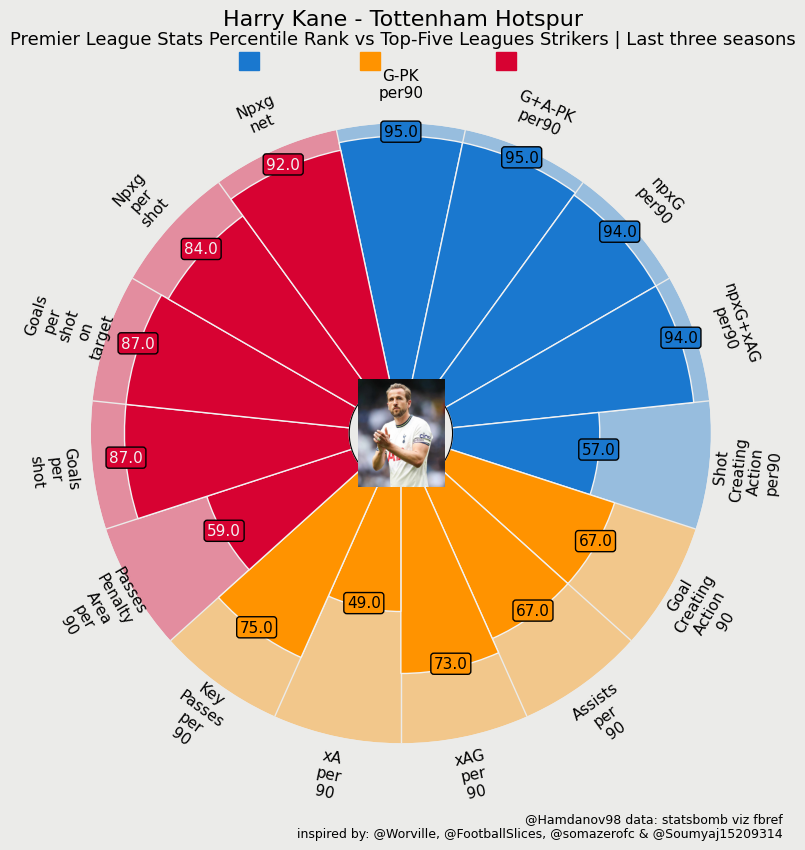

In [24]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kane_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Harry Kane - Tottenham Hotspur", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Strikers | Last three seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kane_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


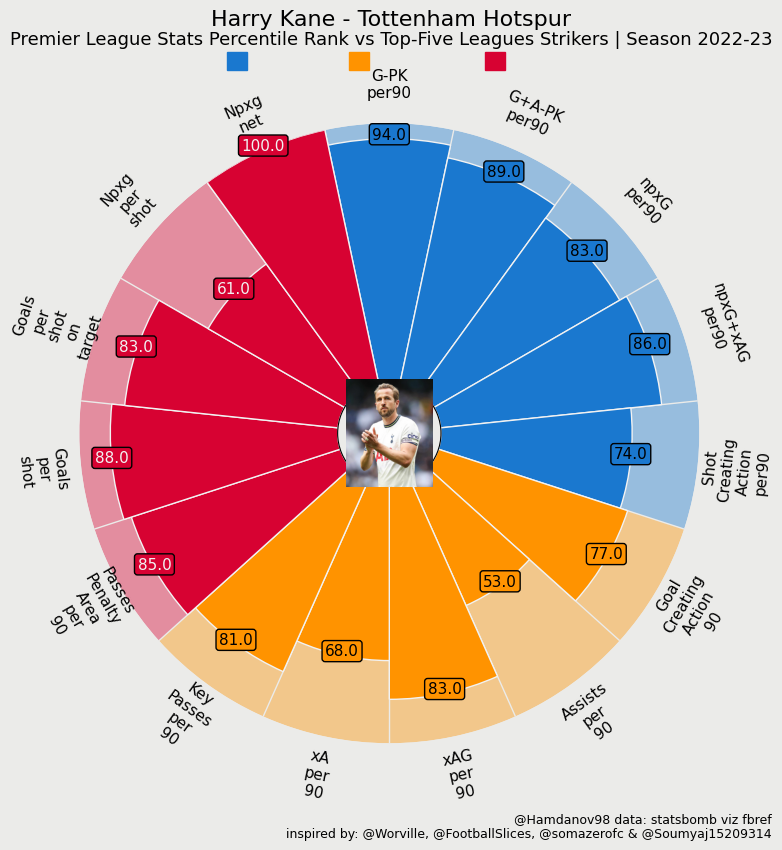

In [25]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kane_2023_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Harry Kane - Tottenham Hotspur", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Strikers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kane_2023_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


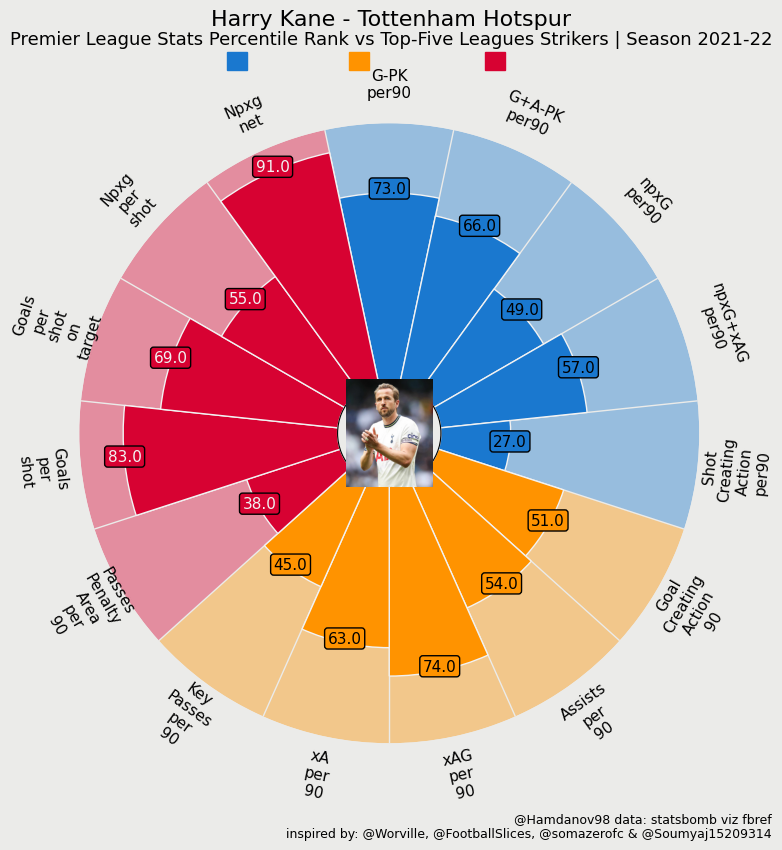

In [26]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kane_2022_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Harry Kane - Tottenham Hotspur", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Strikers | Season 2021-22",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kane_2022_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


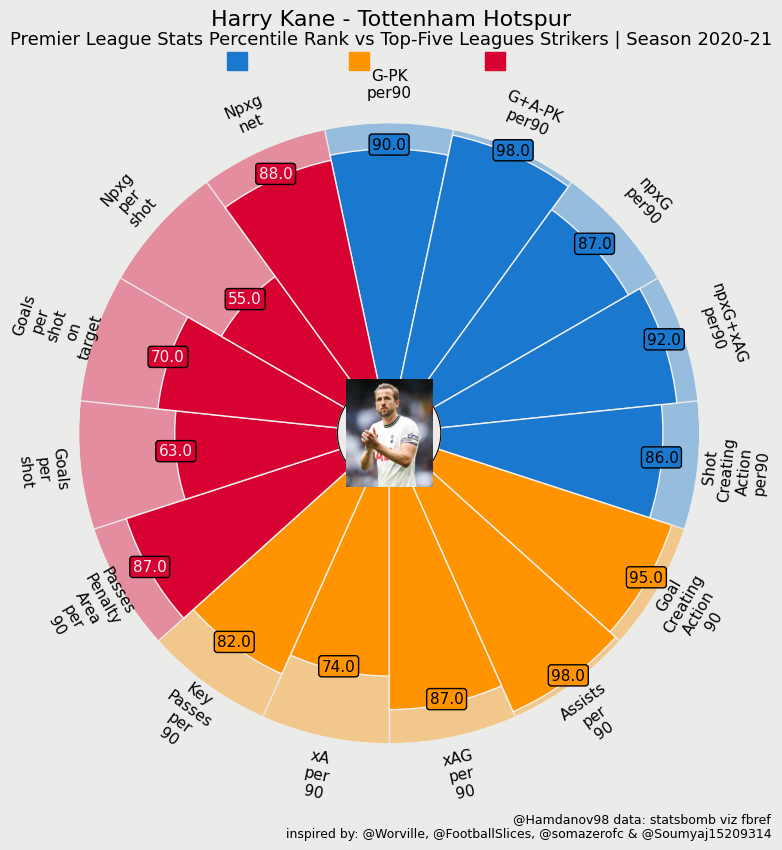

In [27]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    kane_2021_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Harry Kane - Tottenham Hotspur", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Strikers | Season 2020-21",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Kane_2021_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [28]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_forward_players = forward_players.select_dtypes(include=np.number)
numerical_forward_players = numerical_forward_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_forward_players = (numerical_forward_players - numerical_forward_players.mean()) / numerical_forward_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.307233167710202,
 0.41439257475322644,
 0.4810118340448954,
 0.5390536086839246,
 0.5836165563455239,
 0.6171883723390688,
 0.6460990901152911,
 0.6705214749255173,
 0.6929547663489808,
 0.7127717357238461,
 0.7303689097485042,
 0.7468268567077581,
 0.7620498962873972,
 0.7755941023763059,
 0.7884608977368454]

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)



In [30]:
transformed_df

0          1         2          3          4         5         6   \
0    16.521874   2.144432 -4.807994   8.352232   2.202723 -0.733715 -0.501626   
1    13.991412   4.148505  2.766482   5.746439  -1.406495  0.271160  1.041672   
2     7.469848  -2.375166 -0.634541  -2.894871   0.627268 -2.390575  1.336999   
3     5.377787 -11.137765 -2.714331   4.093473  -0.630714  1.080313 -0.626296   
4     0.680268  -5.251669  2.114066  -1.910829   1.246676 -3.054067  0.447429   
5    -0.736670  -4.872849  0.792521   0.472124   5.515202  2.378666  3.706391   
6    -1.095943  -3.977610  0.239187  -0.674374   4.677700  0.978274  2.924572   
7     0.864265 -10.619911 -4.195915   5.136203   0.554722 -0.398342 -1.285118   
8     2.698662   2.034758  3.499314  -0.201973   0.098095 -0.697762 -2.159586   
9     1.060445  -0.584597  1.264937  -3.421844   1.055054 -3.079382  0.954314   
10    2.275009  -6.405971 -1.030530   0.531469   0.187141  0.506968 -1.793546   
11    3.285011  -5.740125  0.436873   0.447773  -1.974396  0.268147 -0.844268   
12    2.485001  -4.502311  1.042923   0.065029  -1.949177  0.288606 -1.651733   
13   -2.110143  -1.875846  1.765997  -0.017979   1.343869  0.231386 -0.617581   
14   -1.613388  -1.813624  0.319862  -2.109344  -0.742064 -1.065302 -0.710881   
15   -0.384348  -1.139040  1.478692  -4.118710   1.828745 -1.536934 -1.853729   
16    7.182288   0.364555  2.260395   1.349698  -2.992714  0.722439  3.358788   
17    4.366689  -2.838316 -2.950422  -0.344948  -0.885698  0.118567  0.140118   
18    9.772100  -1.229475 -1.941605  -3.925475   0.240539 -0.810604 -1.313813   
19   -3.490238   0.701749  2.105883  -3.709226   1.204341 -0.694271 -3.498830   
20   -2.489671  -3.423898  4.183937   0.472842   7.043742  5.790921  5.658860   
21   10.087559   2.383747 -3.281462  -3.673923  -0.404593  0.769806 -0.860090   
22   -0.636521  -0.732724  1.821477  -1.083860   1.178130  0.741622 -0.569206   
23   -3.537749  -5.451243  1.072066   0.920292   1.143304 -3.194607  0.430758   
24   -1.309276  -2.309402  0.607046  -0.194003   1.784705  5.662423 -1.074249   
25   -3.830430  -2.526447  1.991964  -1.547731   0.142033 -0.658028 -1.522305   
26   -5.411145  -4.805522  0.782928   1.156481   2.062049 -2.891500  0.427208   
27   15.633262   0.049439 -4.412263  -6.890140   1.398153 -1.998623 -1.441923   
28   11.551252  -2.682953  5.464188   1.063180  -3.225904  0.068181 -0.169341   
29   11.807676  -6.502997 -0.114847   2.504323  -4.618980  3.124058  1.166625   
30    9.450995  -1.354936 -1.812652  -1.945554   1.434498 -1.510290 -0.271279   
31   -2.887181  -0.612717  1.350476  -1.655262   0.965645 -2.293481  3.006040   
32   -2.158512  -2.724561  0.380153   0.833261  -0.469218 -1.191705  2.646209   
33   -0.465660  -1.287412  0.828297  -1.625324   5.673940  3.887358  3.899472   
34    7.316284  -0.567033  1.062242  -5.487305   0.979810 -1.950117 -3.056373   
35   -1.348498  -3.031511  2.405319  -0.741258  -0.802977 -1.506701  2.873282   
36    9.518143   0.280484  8.220133  -1.599683  -4.751942  3.205453  0.357748   
37   -2.571833  -2.017540  4.613480  -0.950120  -1.523997  0.730401 -0.685632   
38    6.385345   0.942450 -0.519317  -2.384050   0.247812 -0.808257  1.640631   
39    2.644759   4.277254  2.412871  -5.134044   0.202905 -1.226633  0.422932   
40    7.634837   3.001340  4.010088  -3.205155  -2.847386  1.577391  0.290211   
41    1.767815  -0.375470  6.563703  -4.401208  -0.863820 -2.504895  0.893999   
42    6.251286   2.914766  3.416669  -4.704998  -0.841006 -1.367097 -0.400768   
43   -1.054414  -2.157355  3.134988  -1.687752  -0.540008 -0.562850 -1.233222   
44    2.724433  -2.884164  2.322230   0.416641  -2.247117  2.163871 -0.372287   
45    8.448291  -2.424347 -0.404633   1.330785  -3.439033  1.330176  2.221094   
46    4.444471   0.272980 -1.513826  -1.241828  -0.879463  0.447615  1.016443   
47   -2.641879  -5.052492 -0.726366   1.679055   0.535728  0.601607 -1.223900   
48   18.765577   7.429803 -2.659091   0.729

In [31]:
# Remove Harry Kane's row and store it in a separate variable
kane_data = transformed_df.iloc[58].copy()
transformed_df = transformed_df.drop(transformed_df.index[58])

# Compute cosine similarity between each player and Harry Kane
similarity_scores = cosine_similarity(transformed_df, kane_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_kane'] = similarity_scores

# Display the top 10 players most similar to Kane
top_similar_players = transformed_df.sort_values('similarity_to_kane', ascending=False).head(10)
top_similar_players

0          1         2         3         4         5         6  \
28  11.551252  -2.682953  5.464188  1.063180 -3.225904  0.068181 -0.169341   
93   4.533723  -6.701244 -0.413293  1.566641 -0.887701 -0.158038 -1.264260   
70  12.545319  -6.014087 -1.474093 -1.306585 -1.152349 -0.250456  0.415076   
29  11.807676  -6.502997 -0.114847  2.504323 -4.618980  3.124058  1.166625   
89   1.811354  -3.657031  0.310533  0.294809 -1.156022 -0.416581  0.538753   
45   8.448291  -2.424347 -0.404633  1.330785 -3.439033  1.330176  2.221094   
11   3.285011  -5.740125  0.436873  0.447773 -1.974396  0.268147 -0.844268   
76  18.148626  -6.178988 -5.949726 -0.546152  1.852616  0.294561 -1.725591   
3    5.377787 -11.137765 -2.714331  4.093473 -0.630714  1.080313 -0.626296   
12   2.485001  -4.502311  1.042923  0.065029 -1.949177  0.288606 -1.651733   

           7         8         9        10        11        12        13  \
28  0.166456 -0.979945 -1.554048  0.048432 -1.175752 -1.283020 -1.404409   
93 -1.059538  0.588871 -0.499591  1.363333 -2.004440 -0.895486  0.534857   
70  1.305734  2.122288  0.652341 -1.245150 -0.276937 -1.381865  2.224121   
29 -0.716722 -0.937700 -1.496840 -1.900819 -0.888162 -1.768420 -1.917707   
89  0.347398  0.063295  0.660339  1.162766  0.929043 -0.680938 -0.374361   
45  3.419245 -1.210886 -1.080258  0.897344 -0.173459  1.704414 -2.875641   
11 -1.441318  1.421211 -0.511200  1.267494  0.603747 -1.034396  1.062212   
76  2.166844  0.492114 -3.199131  1.399234 -2.713909 -0.734141  0.260059   
3   0.603502 -0.520997 -0.365840 -0.513728 -0.478845  1.279454 -1.202918   
12 -0.549828  0.186925  1.789949  0.802163  0.126272 -1.513576 -1.329902   

          14  similarity_to_kane  
28  1.075770            0.847911  
93  0.872539            0.840126  
70  0.922914            0.789785  
29  0.203594            0.779583  
89 -0.391016            0.770424  
45  1.780853            0.758949  
11 -0.004776            0.751090  
76 -2.799263            0.734205  
3   1.184736            0.726247  
12  2.023672            0.706808

In [32]:
# Get the top 10 players most similar to Kane
top_similar_players_indices = transformed_df.sort_values('similarity_to_kane', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = forward_players.loc[top_similar_players_indices]
top_similar_players

Unnamed: 0                    Player   Nation Pos  \
28          191                Iago Aspas   es ESP  FW   
93          736         Wissam Ben Yedder   fr FRA  FW   
70          507             Mohamed Salah   eg EGY  FW   
29          198             Karim Benzema   fr FRA  FW   
89          701             Álvaro Morata   es ESP  FW   
45          323             Gerard Moreno   es ESP  FW   
11           58             Ciro Immobile   it ITA  FW   
76          569             Kylian Mbappé   fr FRA  FW   
3            10        Robert Lewandowski   pl POL  FW   
12           71       Alexandre Lacazette   fr FRA  FW   
92          720             Son Heung-min   kr KOR  FW   
94          740          Domenico Berardi   it ITA  FW   
30          201               Rafael Leão   pt POR  FW   
2             8           Marcus Rashford  eng ENG  FW   
87          684                Sadio Mané   sn SEN  FW   
16           89             Alassane Pléa   fr FRA  FW   
81          637            Jonathan David   ca CAN  FW   
10           50          Lautaro Martínez   ar ARG  FW   
17          113                Diogo Jota   pt POR  FW   
71          508                    Joselu   es ESP  FW   
59          399             Romelu Lukaku   be BEL  FW   
100         767           Felipe Anderson   br BRA  FW   
36          259            Florian Sotoca   fr FRA  FW   
73          510              Riyad Mahrez   dz ALG  FW   
1             1              Paulo Dybala   ar ARG  FW   
66          480           Roberto Firmino   br BRA  FW   
0             0               Luis Muriel   co COL  FW   
95          742             Gabriel Jesus   br BRA  FW   
86          663          Karl Toko Ekambi   cm CMR  FW   
34          230             Wilfried Zaha   ci CIV  FW   
27          185           Vinicius Júnior   br BRA  FW   
18          121           Raheem Sterling  eng ENG  FW   
7            34            Erling Haaland   no NOR  FW   
80          625         Randal Kolo Muani   fr FRA  FW   
84          658               André Silva   pt POR  FW   
38          273            Hirving Lozano   mx MEX  FW   
122         938                Martinelli   br BRA  FW   
40          292          Nicolás González   ar ARG  FW   
44          309                Edin Džeko   ba BIH  FW   
4            15             Ollie Watkins  eng ENG  FW   
91          707           Ludovic Ajorque   fr FRA  FW   
48          333           Ousmane Dembélé   fr FRA  FW   
49          337              Duván Zapata   co COL  FW   
75          568         Kelechi Iheanacho   ng NGA  FW   
46          330            Joaquín Correa   ar ARG  FW   
110         840                Ivan Toney  eng ENG  FW   
21          139                   Rodrygo   br BRA  FW   
78          611             Kévin Gameiro   fr FRA  FW   
128         977           Gerard Deulofeu   es ESP  FW   
104         789          Marko Arnautović   at AUT  FW   
8            35              Wahbi Khazri   tn TUN  FW   
62          436            Iñaki Williams   gh GHA  FW   
68          500             Daniele Verde   it ITA  FW   
69          506       Alexis Saelemaekers   be BEL  FW   
42          303             Lucas Ocampos   ar ARG  FW   
55          390               Andy Delort   dz ALG  FW   
57          396                 Enes Ünal   tr TUR  FW   
116         900             Donyell Malen   nl NED  FW   
52          370           Michail Antonio   jm JAM  FW   
5            27            Dušan Vlahović   rs SRB  FW   
9            43               Richarlison   br BRA  FW   
101         777              Bryan Mbeumo   cm CMR  FW   
50          355                Lucas Boyé   ar ARG  FW   
41          302            Emmanuel Gyasi   gh GHA  FW   
167        1214     Khvicha Kvaratskhelia   ge GEO  FW   
131        1018                   Willian   br BRA  FW   
60          417            Victor Osimhen   ng NGA  FW   
43          304                 Che Adams  sct SCO  FW   
126

In [33]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
aspas_percentile_ranks = round(players_percentile_ranks.iloc[[28]],0)

# Print the percentile ranks for Harry aspas
print(aspas_percentile_ranks)


    G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
28        54.0          67.0        37.0            57.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
28                        74.0                     67.0            79.0   

    xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
28        86.0       91.0               96.0                        87.0   

    Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
28            97.0                      98.0           92.0      94.0  


In [34]:
aspas_percentile_ranks_list = aspas_percentile_ranks.values.flatten().tolist()

aspas_percentile_ranks_list

[54.0,
 67.0,
 37.0,
 57.0,
 74.0,
 67.0,
 79.0,
 86.0,
 91.0,
 96.0,
 87.0,
 97.0,
 98.0,
 92.0,
 94.0]

In [35]:
image_path = "Aspas.jpg"
fdj_cropped = Image.open(image_path)


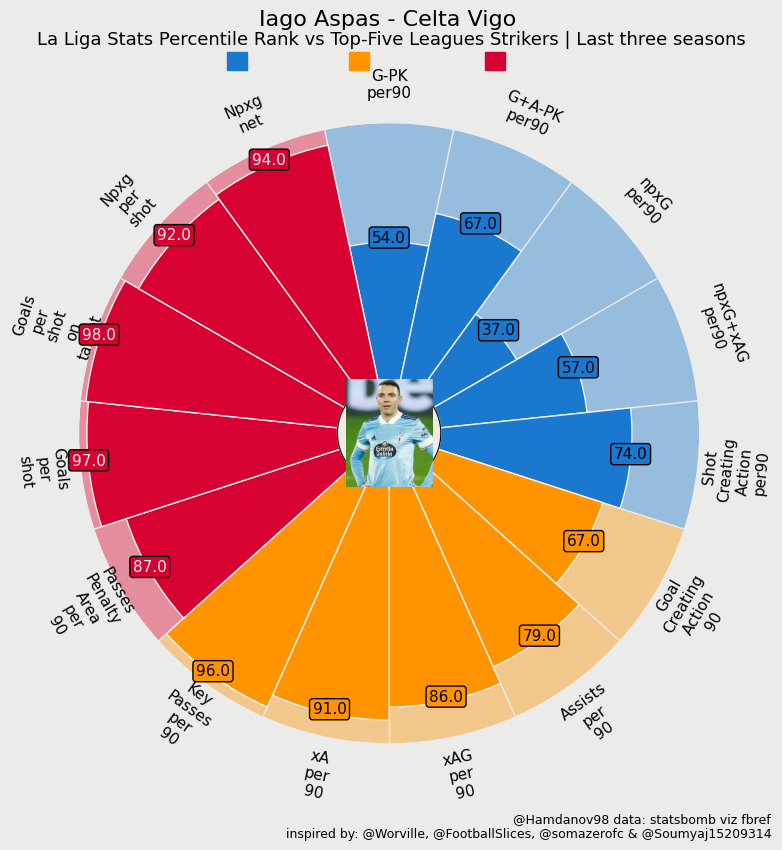

In [36]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    aspas_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Iago Aspas - Celta Vigo ", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Strikers | Last three seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Aspas_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [37]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = forward_players[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
wissam_percentile_ranks = round(players_percentile_ranks.iloc[[93]],0)

# Print the percentile ranks for Harry wissam
print(wissam_percentile_ranks)


    G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
93        89.0          91.0        77.0            84.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
93                        48.0                     72.0            82.0   

    xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
93        82.0       86.0               65.0                        85.0   

    Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
93           100.0                      99.0           95.0      93.0  


In [38]:
wissam_percentile_ranks_list = wissam_percentile_ranks.values.flatten().tolist()

wissam_percentile_ranks_list

[89.0,
 91.0,
 77.0,
 84.0,
 48.0,
 72.0,
 82.0,
 82.0,
 86.0,
 65.0,
 85.0,
 100.0,
 99.0,
 95.0,
 93.0]

In [39]:
image_path = "BenYedder.jpg"
fdj_cropped = Image.open(image_path)


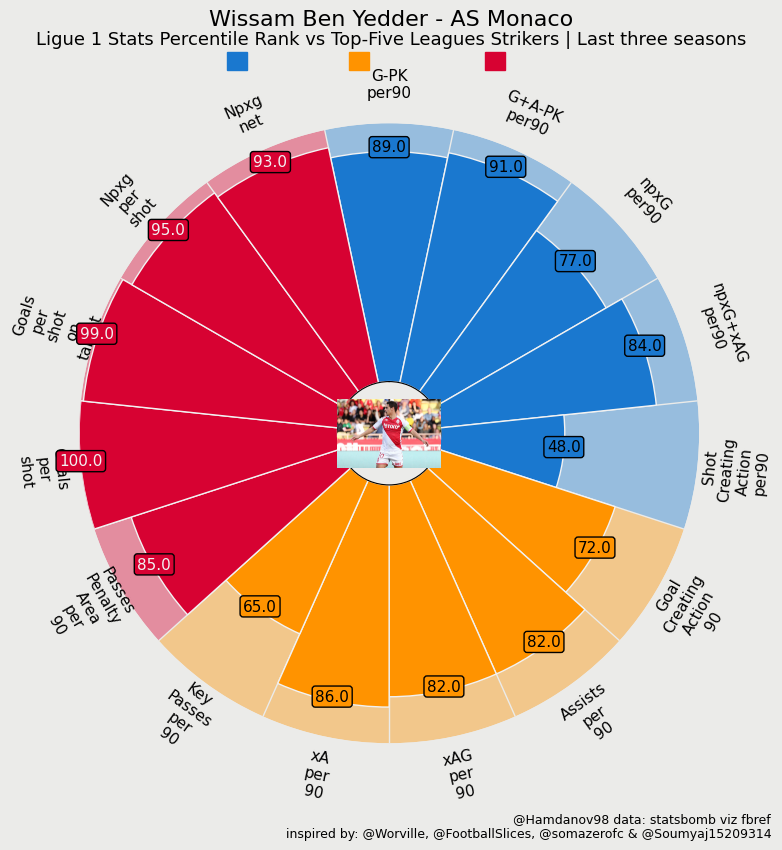

In [40]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    wissam_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Wissam Ben Yedder - AS Monaco", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Strikers | Last three seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('BenYedder_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [41]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_forward_players = player_2023.select_dtypes(include=np.number)
numerical_forward_players = numerical_forward_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_forward_players = (numerical_forward_players - numerical_forward_players.mean()) / numerical_forward_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.1986421162765559,
 0.30516795680744513,
 0.3709780215123008,
 0.41500916304505964,
 0.45214686189825537,
 0.4879682054380113,
 0.5223646931774342,
 0.5529105689978863,
 0.5785976783556895,
 0.6018341311747317,
 0.6233645375753264,
 0.6427146038751802,
 0.6607341149096562,
 0.6770047752170187,
 0.6928573946391793]

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)



In [43]:
# Remove Harry Kane's row and store it in a separate variable
kane_data = transformed_df.iloc[139].copy()
transformed_df = transformed_df.drop(transformed_df.index[139])

# Compute cosine similarity between each player and Harry Kane
similarity_scores = cosine_similarity(transformed_df, kane_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_kane_2023'] = similarity_scores

# Display the top 10 players most similar to Kane
top_similar_players = transformed_df.sort_values('similarity_to_kane_2023', ascending=False).head(10)
top_similar_players

0         1         2         3         4         5         6  \
153   6.324685 -4.661539  0.984351 -0.249372 -0.765866 -1.088981 -0.577959   
172   4.539870 -3.889320  1.557317  0.615525 -1.084721 -0.186044 -0.650216   
91    4.954272 -3.290841 -0.679460  0.131628 -0.899202 -2.360602 -0.321006   
245   6.101899 -3.868216 -0.285431 -0.825370 -1.251020  0.658694 -2.304236   
6     6.961172 -2.486724 -1.549577 -0.443603 -1.880735 -0.464808 -1.427873   
171  10.456970 -2.576857 -2.642480  0.296636  0.395128  0.960765 -2.110119   
178   3.183907 -3.559858 -1.976614 -1.167126 -0.997458 -0.783248 -1.550180   
312   7.349758 -2.367062 -2.916352  0.015500 -2.169274 -0.127912 -2.215506   
8     9.766781 -3.633573 -3.615854 -1.001295 -2.750568 -1.335626 -2.274189   
289   2.551967 -3.986623  0.410860 -0.833644 -0.879721 -1.571215 -0.207988   

            7         8         9        10        11        12        13  \
153 -1.021597  0.983752  0.906783 -0.067750 -0.017544  0.350793  0.371441   
172 -1.004183  1.159242  0.358820  0.669826 -0.299056  0.225679  0.633992   
91  -0.117171  1.994902  1.327682 -0.440096 -1.140638 -0.234504 -0.236483   
245 -0.529086 -0.026866 -0.158922  1.296371 -0.697553  0.060241 -0.185722   
6   -0.863628  0.438971  2.437182 -0.297840  0.266599 -0.661506 -1.434945   
171 -3.115953  1.663473  0.598882  1.071565 -0.761874 -0.237841 -1.081411   
178 -0.058605  0.077164  1.242815  0.509225 -0.050888 -0.222771  0.039314   
312  0.146152  0.669179  1.551208  1.149374 -0.943246 -0.592791  0.847188   
8    0.455138  1.080275  3.031500 -0.525755 -0.609014 -0.142939 -1.793935   
289 -0.229514  1.348482  0.359571  1.188710 -0.820041  0.881849  0.616954   

           14  similarity_to_kane_2023  
153 -0.053108                 0.940082  
172 -0.479211                 0.908673  
91  -0.130751                 0.900737  
245 -0.187930                 0.881806  
6   -0.440892                 0.867252  
171 -1.386991                 0.866484  
178 -0.038291                 0.865482  
312 -0.877257                 0.853756  
8   -0.548112                 0.840884  
289  0.786181                 0.834860

In [44]:
# Get the top 10 players most similar to Kane
top_similar_players_indices_2023 = transformed_df.sort_values('similarity_to_kane_2023', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players_2023 = player_2023.loc[top_similar_players_indices_2023]
top_similar_players_2023

Unnamed: 0.1  Unnamed: 0                     Player   Nation Pos  \
153          1220        1455        Alexandre Lacazette   fr FRA  FW   
172          1403        1684           Lautaro Martínez   ar ARG  FW   
91            801         961            Niclas Füllkrug   de GER  FW   
245          1826        2201            Marcus Rashford  eng ENG  FW   
6              70          80             Miguel Almirón   py PAR  FW   
171          1400        1680                 Martinelli   br BRA  FW   
178          1432        1717              Borja Mayoral   es ESP  FW   
312          2325        2837            Mattia Zaccagni   it ITA  FW   
8              93         105            Felipe Anderson   br BRA  FW   
289          2158        2634                 Ivan Toney  eng ENG  FW   
254          1941        2351           Antonio Sanabria   py PAR  FW   
209          1611        1932              Arnaud Nordin   fr FRA  FW   
24            222         254            Sheraldo Becker   sr SUR  FW   
212          1620        1947               M'Bala Nzola   ao ANG  FW   
251          1922        2329                Bukayo Saka  eng ENG  FW   
65            611         720               Habib Diallo   sn SEN  FW   
93            814         975              Kévin Gameiro   fr FRA  FW   
17            137         152                 Iago Aspas   es ESP  FW   
59            559         654             Jonathan David   ca CAN  FW   
252          1927        2334              Mohamed Salah   eg EGY  FW   
179          1439        1724              Kylian Mbappé   fr FRA  FW   
151          1214        1445      Khvicha Kvaratskhelia   ge GEO  FW   
158          1276        1526         Robert Lewandowski   pl POL  FW   
303          2291        2799             Iñaki Williams   gh GHA  FW   
27            242         279          Wissam Ben Yedder   fr FRA  FW   
86            771         925                 Phil Foden  eng ENG  FW   
123          1049        1258                  Junya Ito   jp JPN  FW   
253          1937        2344           Mama Samba Baldé   gw GNB  FW   
199          1561        1873               Vedat Muriqi   xk KVX  FW   
292          2196        2681                  Enes Ünal   tr TUR  FW   
80            713         846               Breel Embolo   ch SUI  FW   
133          1090        1308                     Joselu   es ESP  FW   
305          2294        2802                    Willian   br BRA  FW   
146          1176        1404          Randal Kolo Muani   fr FRA  FW   
121          1037        1238             Jonathan Ikone   fr FRA  FW   
180          1442        1727               Bryan Mbeumo   cm CMR  FW   
304          2293        2801              Nico Williams   es ESP  FW   
20            181         208             Jonathan Bamba   ci CIV  FW   
100           894        1074              Jack Grealish  eng ENG  FW   
34            317         367                 Lucas Boyé   ar ARG  FW   
222          1712        2060                      Pedro   es ESP  FW   
73            675         800             Marvin Ducksch   de GER  FW   
29            250         290           Domenico Berardi   it ITA  FW   
217          1658        1991          Riccardo Orsolini   it ITA  FW   
218          1661        1995             Victor Osimhen   ng NGA  FW   
215          1652        1985                Loïs Openda   be BEL  FW   
185          1506        1806        Aleksandar Mitrović   rs SRB  FW   
152          1215        1446               Grejohn Kyei   fr FRA  FW   
136          1102        1322            Vinicius Júnior   br BRA  FW   
299          2263        2768                  Elye Wahi   fr FRA  FW   
105           937        1129             Erling Haaland   no NOR  FW   
167          1357        1625              Donyell Malen   nl NED  FW   
244          1823        2198                   Raphinha   br BRA  FW   
148          1187        1417           Christian Kouamé   ci C

In [45]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
fullkrug_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[91]],0)

# Print the percentile ranks for Harry fullkrug
print(fullkrug_2023_percentile_ranks)


    G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
91        77.0          80.0        61.0            60.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
91                        58.0                     62.0            77.0   

    xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
91        66.0       73.0               71.0                        79.0   

    Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
91            72.0                      64.0           52.0      91.0  


In [46]:
fullkrug_2023_percentile_ranks_list = fullkrug_2023_percentile_ranks.values.flatten().tolist()

fullkrug_2023_percentile_ranks_list

[77.0,
 80.0,
 61.0,
 60.0,
 58.0,
 62.0,
 77.0,
 66.0,
 73.0,
 71.0,
 79.0,
 72.0,
 64.0,
 52.0,
 91.0]

In [47]:
image_path = "Fullkrug.jpg"
fdj_cropped = Image.open(image_path)


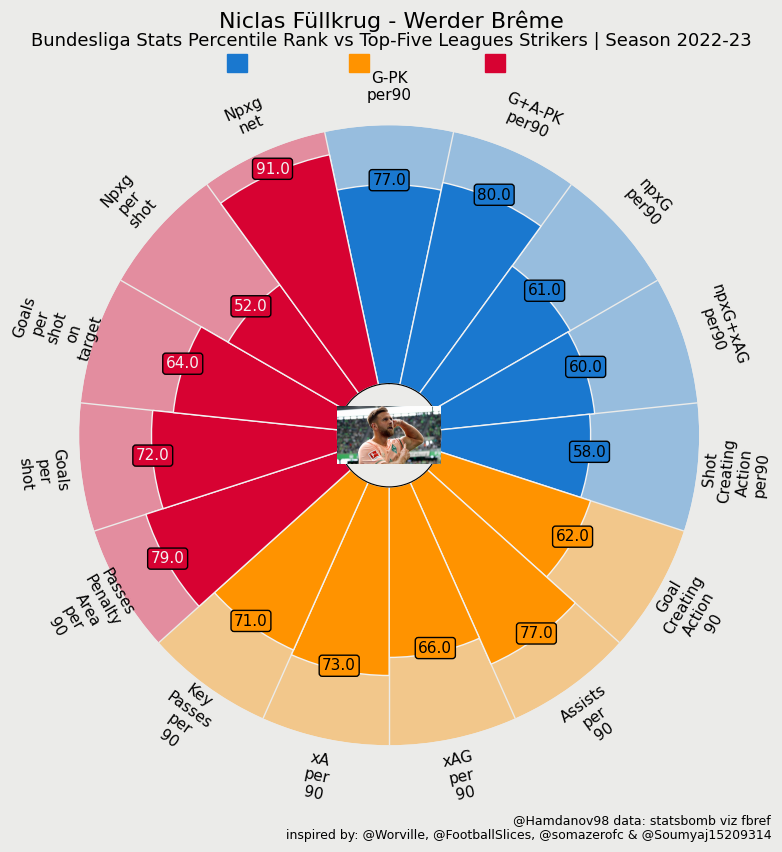

In [48]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    fullkrug_2023_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Niclas Füllkrug - Werder Brême", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Bundesliga Stats Percentile Rank vs Top-Five Leagues Strikers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Fullkrug_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [49]:
import pandas as pd





params=['G-PK_per90',
       'G+A-PK_per90', 'npxG_per90',
       'npxG+xAG_per90', 'Shot_Creating_Action_per90',
       'Goal_Creating_Action_90', 'Assists_per_90', 'xAG_per_90', 'xA_per_90', 
       'Key_Passes_per_90', 'Passes_Penalty_Area_per_90',
     'Goals_per_shot',
       'Goals_per_shot_on_target', 'Npxg_per_shot', 'Npxg_net']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
lacazette_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[153]],0)

# Print the percentile ranks for Harry lacazette
print(lacazette_2023_percentile_ranks)


     G-PK_per90  G+A-PK_per90  npxG_per90  npxG+xAG_per90  \
153        94.0          91.0        91.0            91.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
153                        74.0                     60.0            69.0   

     xAG_per_90  xA_per_90  Key_Passes_per_90  Passes_Penalty_Area_per_90  \
153        78.0       87.0               79.0                        89.0   

     Goals_per_shot  Goals_per_shot_on_target  Npxg_per_shot  Npxg_net  
153            88.0                      81.0           84.0      96.0  


In [50]:
lacazette_2023_percentile_ranks_list = lacazette_2023_percentile_ranks.values.flatten().tolist()

lacazette_2023_percentile_ranks_list

[94.0,
 91.0,
 91.0,
 91.0,
 74.0,
 60.0,
 69.0,
 78.0,
 87.0,
 79.0,
 89.0,
 88.0,
 81.0,
 84.0,
 96.0]

In [51]:
image_path = "Lacazette.jpg"
fdj_cropped = Image.open(image_path)


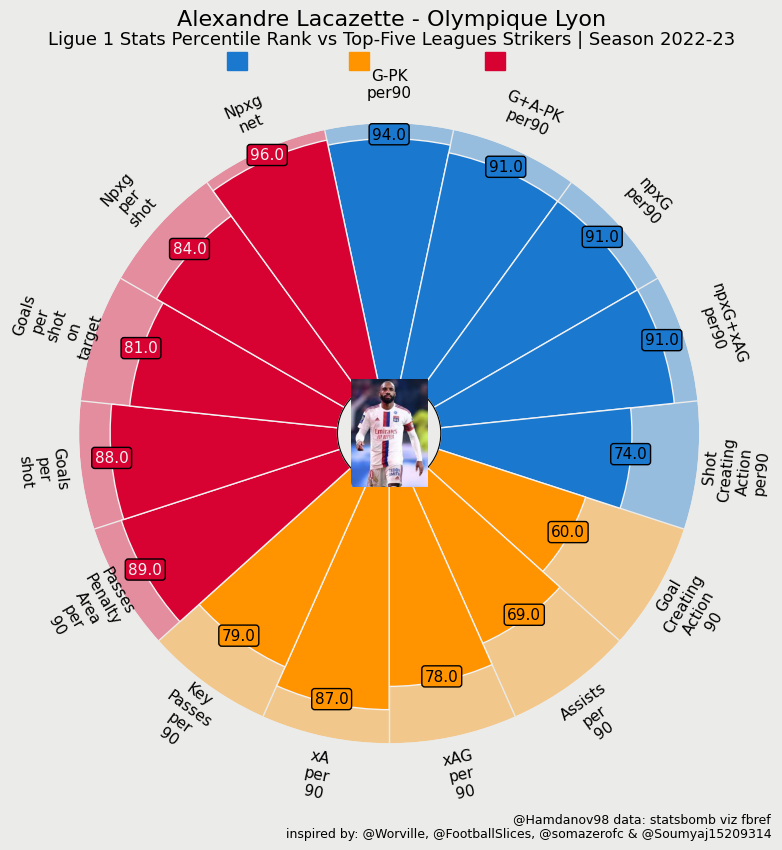

In [52]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    lacazette_2023_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Alexandre Lacazette - Olympique Lyon", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1 Stats Percentile Rank vs Top-Five Leagues Strikers | Season 2022-23",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)


fig.patches.extend([
plt.Rectangle(
(0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.462, 0.9225), 0.025, 0.021, fill=True, color="#ff9300",
transform=fig.transFigure, figure=fig
),
plt.Rectangle(
(0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
transform=fig.transFigure, figure=fig
),
])


ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Lacazette_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [53]:


# Concatenate newbie and kane_data vertically
newbie = pd.concat([newbie, Kane], ignore_index=True)

# Now the data for "Kane_2023" is added as the final row in the "newbie" DataFrame
newbie

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
0           95.0         107             Komnen Andrić   rs SRB  FW   
1          106.0         118                    Antony   br BRA  FW   
2          129.0         143                    Arthur   br BRA  FW   
3          179.0         206           Folarin Balogun   us USA  FW   
4          225.0         260             Kevin Behrens   de GER  FW   
5          255.0         297            Mergim Berisha   de GER  FW   
6          387.0         446            Sergio Camello   es ESP  FW   
7          416.0         491      Valentín Castellanos   ar ARG  FW   
8          429.0         504              Assan Ceesay   gm GAM  FW   
9          467.0         546            Daniel Ciofani   it ITA  FW   
10         487.0         568           Lorenzo Colombo   it ITA  FW   
11         510.0         593               Diego Costa   es ESP  FW   
12         544.0         635            Thijs Dallinga   nl NED  FW   
13         594.0         702            Cyriel Dessers   ng NGA  FW   
14         672.0         796          Dion Drena Beljo   hr CRO  FW   
15         675.0         800            Marvin Ducksch   de GER  FW   
16         741.0         884                 Ansu Fati   es ESP  FW   
17         751.0         898             Evan Ferguson   ie IRL  FW   
18         801.0         961           Niclas Füllkrug   de GER  FW   
19         928.0        1120            Gorka Guruzeta   es ESP  FW   
20         977.0        1174             Luiz Henrique   br BRA  FW   
21        1003.0        1201           Philipp Hofmann   de GER  FW   
22        1025.0        1226            Rasmus Højlund   dk DEN  FW   
23        1031.0        1232        Mounaim El Idrissy   fr FRA  FW   
24        1049.0        1258                 Junya Ito   jp JPN  FW   
25        1055.0        1265           Nicolas Jackson   sn SEN  FW   
26        1127.0        1351            Wilfried Kanga   ci CIV  FW   
27        1130.0        1354             Kenan Karaman   tr TUR  FW   
28        1181.0        1409             Ibrahima Koné   ml MLI  FW   
29        1214.0        1445     Khvicha Kvaratskhelia   ge GEO  FW   
30        1215.0        1446              Grejohn Kyei   fr FRA  FW   
31        1235.0        1473                Cyle Larin   ca CAN  FW   
32        1270.0        1518               Sergio León   es ESP  FW   
33        1429.0        1713  Eric Maxim Choupo-Moting   cm CMR  FW   
34        1512.0        1814           Mostafa Mohamed   eg EGY  FW   
35        1523.0        1830             Kieffer Moore  wls WAL  FW   
36        1538.0        1849         Youssoufa Moukoko   de GER  FW   
37        1597.0        1916              M'Baye Niang   sn SEN  FW   
38        1606.0        1927             Eddie Nketiah  eng ENG  FW   
39        1616.0        1940              Darwin Núñez   uy URU  FW   
40        1645.0        1977                Ado Onaiwu   jp JPN  FW   
41        1652.0        1985               Loïs Openda   be BEL  FW   
42        1655.0        1988              Divock Origi   be BEL  FW   
43        1714.0        2062              Jordan Pefok   us USA  FW   
44        1766.0        2131             Gonzalo Plata   ec ECU  FW   
45        2015.0        2448             Abdallah Sima   sn SEN  FW   
46        2033.0        2472             Islam Slimani   dz ALG  FW   
47        2084.0        2539      Jørgen Strand Larsen   no NOR  FW   
48        2089.0        2544          Cristhian Stuani   uy URU  FW   
49        2097.0        2554     Crysencio Summerville   nl NED  FW   
50        2127.0        2592             Simon Terodde   de GER  FW   
51        2144.0        2618            Steffen Tigges   de GER  FW   
52        2184.0        2666            Frank Tsadjout   it ITA  FW   
53        2249.0        2750           Carlos Vinícius   br BRA  FW   
54        2297.0        2805              Harry Wilson  wls WAL  FW   
55        2355.0        2876

In [54]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Removing non-numerical columns
numerical_forward_players = newbie.select_dtypes(include=np.number)

# Handling missing values by imputation
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' as well
numerical_forward_players_imputed = imputer.fit_transform(numerical_forward_players)

# Normalizing the data
normalized_forward_players = (numerical_forward_players_imputed - numerical_forward_players_imputed.mean()) / numerical_forward_players_imputed.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.9477398113845937,
 0.9863567621206573,
 0.9938483136636433,
 0.9975162207742031,
 0.9996136115902339,
 0.9998204796015573,
 0.999911127738154,
 0.9999412030654731,
 0.9999605612809779,
 0.9999723018467178,
 0.9999807846023205,
 0.9999853868560676,
 0.9999884818922659,
 0.999990954098661,
 0.9999928824937316]

In [55]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=2)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)



In [56]:
# Remove Harry Kane's row and store it in a separate variable
kane_data = transformed_df.iloc[-1].copy()
transformed_df = transformed_df.drop(transformed_df.index[-1])

# Compute cosine similarity between each player and Harry Kane
similarity_scores = cosine_similarity(transformed_df, kane_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_kane_newbie'] = similarity_scores

# Display the top 10 players most similar to Kane
top_similar_players = transformed_df.sort_values('similarity_to_kane_newbie', ascending=False).head(10)
top_similar_players

0         1  similarity_to_kane_newbie
24  10.833326  0.278535                   0.999969
30   1.377905  0.061654                   0.999639
29  11.967696  0.582415                   0.999526
18   6.812354 -0.580027                   0.994724
15   8.479122 -0.773886                   0.994082
21   2.273644 -0.374374                   0.983661
20   1.627886 -0.390219                   0.968142
44   4.207512  1.490753                   0.948389
23   1.177440 -0.374298                   0.947454
16   2.476108 -0.866483                   0.937839

In [57]:
# Get the top 10 players most similar to Kane
top_similar_players_indices_newbie = transformed_df.sort_values('similarity_to_kane_newbie', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players_newbie = newbie.loc[top_similar_players_indices_newbie]
top_similar_players_newbie

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
24        1049.0        1258                 Junya Ito   jp JPN  FW   
30        1215.0        1446              Grejohn Kyei   fr FRA  FW   
29        1214.0        1445     Khvicha Kvaratskhelia   ge GEO  FW   
18         801.0         961           Niclas Füllkrug   de GER  FW   
15         675.0         800            Marvin Ducksch   de GER  FW   
21        1003.0        1201           Philipp Hofmann   de GER  FW   
20         977.0        1174             Luiz Henrique   br BRA  FW   
44        1766.0        2131             Gonzalo Plata   ec ECU  FW   
23        1031.0        1232        Mounaim El Idrissy   fr FRA  FW   
16         741.0         884                 Ansu Fati   es ESP  FW   
1          106.0         118                    Antony   br BRA  FW   
6          387.0         446            Sergio Camello   es ESP  FW   
3          179.0         206           Folarin Balogun   us USA  FW   
54        2297.0        2805              Harry Wilson  wls WAL  FW   
0           95.0         107             Komnen Andrić   rs SRB  FW   
41        1652.0        1985               Loïs Openda   be BEL  FW   
12         544.0         635            Thijs Dallinga   nl NED  FW   
4          225.0         260             Kevin Behrens   de GER  FW   
49        2097.0        2554     Crysencio Summerville   nl NED  FW   
7          416.0         491      Valentín Castellanos   ar ARG  FW   
45        2015.0        2448             Abdallah Sima   sn SEN  FW   
55        2355.0        2876              Simon Zoller   de GER  FW   
46        2033.0        2472             Islam Slimani   dz ALG  FW   
19         928.0        1120            Gorka Guruzeta   es ESP  FW   
39        1616.0        1940              Darwin Núñez   uy URU  FW   
5          255.0         297            Mergim Berisha   de GER  FW   
51        2144.0        2618            Steffen Tigges   de GER  FW   
47        2084.0        2539      Jørgen Strand Larsen   no NOR  FW   
50        2127.0        2592             Simon Terodde   de GER  FW   
2          129.0         143                    Arthur   br BRA  FW   
8          429.0         504              Assan Ceesay   gm GAM  FW   
56        2437.0          74               Sam Lammers   nl NED  FW   
52        2184.0        2666            Frank Tsadjout   it ITA  FW   
10         487.0         568           Lorenzo Colombo   it ITA  FW   
40        1645.0        1977                Ado Onaiwu   jp JPN  FW   
22        1025.0        1226            Rasmus Højlund   dk DEN  FW   
53        2249.0        2750           Carlos Vinícius   br BRA  FW   
13         594.0         702            Cyriel Dessers   ng NGA  FW   
48        2089.0        2544          Cristhian Stuani   uy URU  FW   
11         510.0         593               Diego Costa   es ESP  FW   
9          467.0         546            Daniel Ciofani   it ITA  FW   
37        1597.0        1916              M'Baye Niang   sn SEN  FW   
38        1606.0        1927             Eddie Nketiah  eng ENG  FW   
14         672.0         796          Dion Drena Beljo   hr CRO  FW   
43        1714.0        2062              Jordan Pefok   us USA  FW   
34        1512.0        1814           Mostafa Mohamed   eg EGY  FW   
17         751.0         898             Evan Ferguson   ie IRL  FW   
35        1523.0        1830             Kieffer Moore  wls WAL  FW   
42        1655.0        1988              Divock Origi   be BEL  FW   
33        1429.0        1713  Eric Maxim Choupo-Moting   cm CMR  FW   
25        1055.0        1265           Nicolas Jackson   sn SEN  FW   
36        1538.0        1849         Youssoufa Moukoko   de GER  FW   
26        1127.0        1351            Wilfried Kanga   ci CIV  FW   
27        1130.0        1354             Kenan Karaman   tr TUR  FW   
32        1270.0        1518               Sergio León   es ESP  FW   
28        1181.0        1409

In [58]:


# Concatenate newbie and kane_data vertically
newbie = pd.concat([newbie, Kane_2023], ignore_index=True)

# Now the data for "Kane_2023" is added as the final row in the "newbie" DataFrame


In [59]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import numpy as np

# Removing non-numerical columns
numerical_forward_players = newbie.select_dtypes(include=np.number)

# Handling missing values by imputation
imputer = SimpleImputer(strategy='mean')  # You can choose 'median' or 'most_frequent' as well
numerical_forward_players_imputed = imputer.fit_transform(numerical_forward_players)

# Normalizing the data
normalized_forward_players = (numerical_forward_players_imputed - numerical_forward_players_imputed.mean()) / numerical_forward_players_imputed.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):
    pca = PCA(n_components=n)
    pca.fit(normalized_forward_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.9496547881062638,
 0.9865845440174408,
 0.9937363654199177,
 0.9975805595840613,
 0.9996059607286202,
 0.9998249285931772,
 0.9999140159267519,
 0.9999429548703613,
 0.9999615378873998,
 0.9999727482370036,
 0.9999809748699813,
 0.9999853698070387,
 0.9999883614933077,
 0.9999909549174477,
 0.9999928137057466]

In [60]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=2)
transformed_players = pca.fit_transform(normalized_forward_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_forward_players.index)



In [61]:
# Remove Harry Kane's row and store it in a separate variable
kane_data = transformed_df.iloc[-1].copy()
transformed_df = transformed_df.drop(transformed_df.index[-1])

# Compute cosine similarity between each player and Harry Kane
similarity_scores = cosine_similarity(transformed_df, kane_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_kane_newbie_2023'] = similarity_scores

# Display the top 10 players most similar to Kane
top_similar_players = transformed_df.sort_values('similarity_to_kane_newbie_2023', ascending=False).head(10)
top_similar_players

0         1  similarity_to_kane_newbie_2023
30   1.144279  0.047354                        0.999990
29  11.540392  0.538066                        0.999953
24  10.436826  0.252892                        0.999920
57  46.043449  0.730232                        0.999779
18   6.479187 -0.591541                        0.991826
15   8.118185 -0.781758                        0.991181
21   2.023734 -0.381394                        0.975199
20   1.390934 -0.394532                        0.951325
44   3.925602  1.446009                        0.950477
1    5.504000 -2.114998                        0.919586

In [62]:
# Get the top 10 players most similar to Kane
top_similar_players_indices_newbie = transformed_df.sort_values('similarity_to_kane_newbie_2023', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players_newbie = newbie.loc[top_similar_players_indices_newbie]
top_similar_players_newbie

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
30        1215.0        1446              Grejohn Kyei   fr FRA  FW   
29        1214.0        1445     Khvicha Kvaratskhelia   ge GEO  FW   
24        1049.0        1258                 Junya Ito   jp JPN  FW   
57           NaN         397                Harry Kane  eng ENG  FW   
18         801.0         961           Niclas Füllkrug   de GER  FW   
15         675.0         800            Marvin Ducksch   de GER  FW   
21        1003.0        1201           Philipp Hofmann   de GER  FW   
20         977.0        1174             Luiz Henrique   br BRA  FW   
44        1766.0        2131             Gonzalo Plata   ec ECU  FW   
1          106.0         118                    Antony   br BRA  FW   
16         741.0         884                 Ansu Fati   es ESP  FW   
23        1031.0        1232        Mounaim El Idrissy   fr FRA  FW   
6          387.0         446            Sergio Camello   es ESP  FW   
3          179.0         206           Folarin Balogun   us USA  FW   
54        2297.0        2805              Harry Wilson  wls WAL  FW   
0           95.0         107             Komnen Andrić   rs SRB  FW   
12         544.0         635            Thijs Dallinga   nl NED  FW   
41        1652.0        1985               Loïs Openda   be BEL  FW   
4          225.0         260             Kevin Behrens   de GER  FW   
49        2097.0        2554     Crysencio Summerville   nl NED  FW   
55        2355.0        2876              Simon Zoller   de GER  FW   
45        2015.0        2448             Abdallah Sima   sn SEN  FW   
46        2033.0        2472             Islam Slimani   dz ALG  FW   
7          416.0         491      Valentín Castellanos   ar ARG  FW   
51        2144.0        2618            Steffen Tigges   de GER  FW   
39        1616.0        1940              Darwin Núñez   uy URU  FW   
47        2084.0        2539      Jørgen Strand Larsen   no NOR  FW   
50        2127.0        2592             Simon Terodde   de GER  FW   
5          255.0         297            Mergim Berisha   de GER  FW   
19         928.0        1120            Gorka Guruzeta   es ESP  FW   
2          129.0         143                    Arthur   br BRA  FW   
8          429.0         504              Assan Ceesay   gm GAM  FW   
52        2184.0        2666            Frank Tsadjout   it ITA  FW   
40        1645.0        1977                Ado Onaiwu   jp JPN  FW   
10         487.0         568           Lorenzo Colombo   it ITA  FW   
53        2249.0        2750           Carlos Vinícius   br BRA  FW   
56        2437.0          74               Sam Lammers   nl NED  FW   
13         594.0         702            Cyriel Dessers   ng NGA  FW   
48        2089.0        2544          Cristhian Stuani   uy URU  FW   
22        1025.0        1226            Rasmus Højlund   dk DEN  FW   
11         510.0         593               Diego Costa   es ESP  FW   
9          467.0         546            Daniel Ciofani   it ITA  FW   
37        1597.0        1916              M'Baye Niang   sn SEN  FW   
38        1606.0        1927             Eddie Nketiah  eng ENG  FW   
43        1714.0        2062              Jordan Pefok   us USA  FW   
34        1512.0        1814           Mostafa Mohamed   eg EGY  FW   
14         672.0         796          Dion Drena Beljo   hr CRO  FW   
35        1523.0        1830             Kieffer Moore  wls WAL  FW   
17         751.0         898             Evan Ferguson   ie IRL  FW   
42        1655.0        1988              Divock Origi   be BEL  FW   
33        1429.0        1713  Eric Maxim Choupo-Moting   cm CMR  FW   
36        1538.0        1849         Youssoufa Moukoko   de GER  FW   
25        1055.0        1265           Nicolas Jackson   sn SEN  FW   
32        1270.0        1518               Sergio León   es ESP  FW   
26        1127.0        1351            Wilfried Kanga   ci CIV  FW   
31        1235.0        1473

In [63]:


# Concatenate newbie and kane_data vertically
newbie = pd.concat([newbie, Kane_2021], ignore_index=True)



In [64]:
# Remove Harry Kane's row and store it in a separate variable
kane_data = transformed_df.iloc[-1].copy()
transformed_df = transformed_df.drop(transformed_df.index[-1])

# Compute cosine similarity between each player and Harry Kane
similarity_scores = cosine_similarity(transformed_df, kane_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_kane_newbie_2021'] = similarity_scores

# Display the top 10 players most similar to Kane
top_similar_players = transformed_df.sort_values('similarity_to_kane_newbie_2021', ascending=False).head(10)
top_similar_players

0         1  similarity_to_kane_newbie_2023  \
29  11.540392  0.538066                        0.999953   
24  10.436826  0.252892                        0.999920   
15   8.118185 -0.781758                        0.991181   
18   6.479187 -0.591541                        0.991826   
44   3.925602  1.446009                        0.950477   
1    5.504000 -2.114998                        0.919586   
21   2.023734 -0.381394                        0.975199   
16   2.222238 -0.864188                        0.918001   
20   1.390934 -0.394532                        0.951325   
30   1.144279  0.047354                        0.999990   

    similarity_to_kane_newbie_2021  
29                        0.997442  
24                        0.997245  
15                        0.988878  
18                        0.985975  
44                        0.924866  
1                         0.919699  
21                        0.894467  
16                        0.871892  
20                        0.811703  
30                        0.767118

In [65]:
# Get the top 10 players most similar to Kane
top_similar_players_indices_newbie_2021 = transformed_df.sort_values('similarity_to_kane_newbie_2021', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players_newbie_2021 = newbie.loc[top_similar_players_indices_newbie_2021]
top_similar_players_newbie_2021

Unnamed: 0.1  Unnamed: 0                    Player   Nation Pos  \
29        1214.0      1445.0     Khvicha Kvaratskhelia   ge GEO  FW   
24        1049.0      1258.0                 Junya Ito   jp JPN  FW   
15         675.0       800.0            Marvin Ducksch   de GER  FW   
18         801.0       961.0           Niclas Füllkrug   de GER  FW   
44        1766.0      2131.0             Gonzalo Plata   ec ECU  FW   
1          106.0       118.0                    Antony   br BRA  FW   
21        1003.0      1201.0           Philipp Hofmann   de GER  FW   
16         741.0       884.0                 Ansu Fati   es ESP  FW   
20         977.0      1174.0             Luiz Henrique   br BRA  FW   
30        1215.0      1446.0              Grejohn Kyei   fr FRA  FW   
23        1031.0      1232.0        Mounaim El Idrissy   fr FRA  FW   
3          179.0       206.0           Folarin Balogun   us USA  FW   
6          387.0       446.0            Sergio Camello   es ESP  FW   
54        2297.0      2805.0              Harry Wilson  wls WAL  FW   
0           95.0       107.0             Komnen Andrić   rs SRB  FW   
12         544.0       635.0            Thijs Dallinga   nl NED  FW   
41        1652.0      1985.0               Loïs Openda   be BEL  FW   
4          225.0       260.0             Kevin Behrens   de GER  FW   
49        2097.0      2554.0     Crysencio Summerville   nl NED  FW   
19         928.0      1120.0            Gorka Guruzeta   es ESP  FW   
56        2437.0        74.0               Sam Lammers   nl NED  FW   
7          416.0       491.0      Valentín Castellanos   ar ARG  FW   
55        2355.0      2876.0              Simon Zoller   de GER  FW   
45        2015.0      2448.0             Abdallah Sima   sn SEN  FW   
46        2033.0      2472.0             Islam Slimani   dz ALG  FW   
39        1616.0      1940.0              Darwin Núñez   uy URU  FW   
22        1025.0      1226.0            Rasmus Højlund   dk DEN  FW   
5          255.0       297.0            Mergim Berisha   de GER  FW   
51        2144.0      2618.0            Steffen Tigges   de GER  FW   
47        2084.0      2539.0      Jørgen Strand Larsen   no NOR  FW   
50        2127.0      2592.0             Simon Terodde   de GER  FW   
8          429.0       504.0              Assan Ceesay   gm GAM  FW   
2          129.0       143.0                    Arthur   br BRA  FW   
40        1645.0      1977.0                Ado Onaiwu   jp JPN  FW   
52        2184.0      2666.0            Frank Tsadjout   it ITA  FW   
10         487.0       568.0           Lorenzo Colombo   it ITA  FW   
25        1055.0      1265.0           Nicolas Jackson   sn SEN  FW   
13         594.0       702.0            Cyriel Dessers   ng NGA  FW   
53        2249.0      2750.0           Carlos Vinícius   br BRA  FW   
34        1512.0      1814.0           Mostafa Mohamed   eg EGY  FW   
37        1597.0      1916.0              M'Baye Niang   sn SEN  FW   
11         510.0       593.0               Diego Costa   es ESP  FW   
38        1606.0      1927.0             Eddie Nketiah  eng ENG  FW   
48        2089.0      2544.0          Cristhian Stuani   uy URU  FW   
9          467.0       546.0            Daniel Ciofani   it ITA  FW   
35        1523.0      1830.0             Kieffer Moore  wls WAL  FW   
33        1429.0      1713.0  Eric Maxim Choupo-Moting   cm CMR  FW   
14         672.0       796.0          Dion Drena Beljo   hr CRO  FW   
17         751.0       898.0             Evan Ferguson   ie IRL  FW   
43        1714.0      2062.0              Jordan Pefok   us USA  FW   
28        1181.0      1409.0             Ibrahima Koné   ml MLI  FW   
42        1655.0      1988.0              Divock Origi   be BEL  FW   
36        1538.0      1849.0         Youssoufa Moukoko   de GER  FW   
31        1235.0      1473.0                Cyle Larin   ca CAN  FW   
32        1270.0      1518.0               Sergio León   es ESP  FW   
26        1127.0      1351.0